<a href="https://colab.research.google.com/github/pythonkvs/seminars/blob/main/opencv_examples/4_Cascade_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/computationalcore/introduction-to-opencv/

# Cascade Classification

One of the key things we can do with vision is object detect.

Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their [paper](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf) and improved later by [Rainer Lienhart](http://wiki.opencv.org.cn/images/5/52/MRL-TR-May02-revised-Dec02.pdf).

It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.

OpenCV provides a training method ( see [Cascade Classifier Training](https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html)) or pretrained models, that can be read using the cv2.CascadeClassifierload method. The pre-*trained* models are located in the data folder in the OpenCV installation or can be found [here](https://github.com/opencv/opencv/tree/3.4/data).

In this notebook we will play with some of the provided pre-trained haarcascades models. More on this topic can be found [here](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html).


In [ ]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/pythonkvs/seminars/master/opencv_examples/test_images/test.jpg \
    -O test.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/pythonkvs/seminars/master/opencv_examples/cascades/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml

!wget --no-check-certificate \
    https://raw.githubusercontent.com/pythonkvs/seminars/master/opencv_examples/cascades/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/pythonkvs/seminars/master/opencv_examples/cascades/haarcascade_eye.xml \
    -O haarcascade_eye.xml


# these imports let you use opencv
import cv2 #opencv itself
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

--2021-12-09 09:24:17--  https://raw.githubusercontent.com/pythonkvs/seminars/master/opencv_examples/test_images/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109719 (107K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 107.15K  --.-KB/s    in 0.02s   

2021-12-09 09:24:17 (5.07 MB/s) - ‘test.jpg’ saved [109719/109719]

--2021-12-09 09:24:17--  https://raw.githubusercontent.com/pythonkvs/seminars/master/opencv_examples/cascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

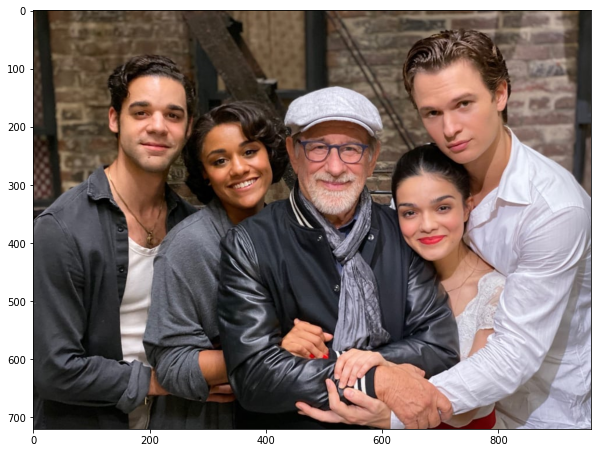

In [ ]:
# Load the test image and create a greyscale copy of it to be used in the classifiers

base_image = cv2.imread('test.jpg')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))

# Face Detection

We will use the pre-trained model haarcascade_frontalface_default.xml to detect faces in the photo. You can find more details about the parameters ofthe detectMultiScale function [here](https://docs.opencv.org/3.4/d1/de5/classcv_1_1CascadeClassifier.html#aaf8181cb63968136476ec4204ffca498).

**Note**: In all examples, I reload the color image again, because the imshow function rewrites the original image with the boxes, but I use the same grayscale image for detection)

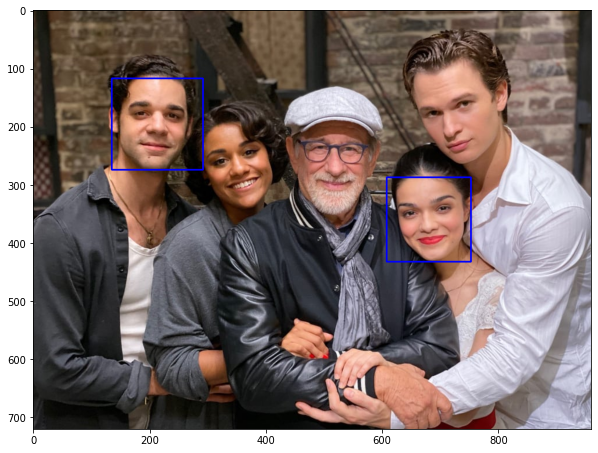

In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

## Smile Detection

We will use the pre-trained model haarcascade_smile.xml to detect smiles on the pictures.

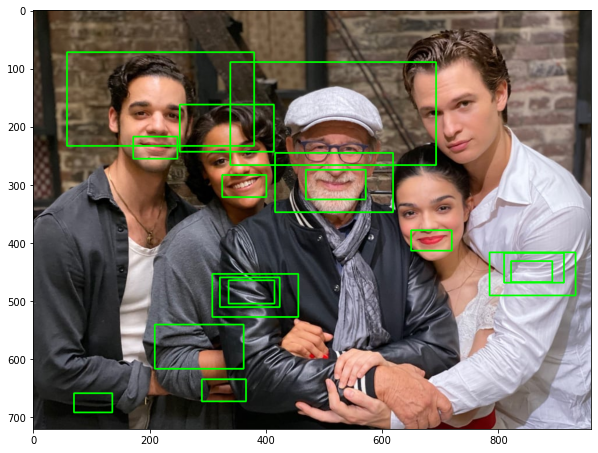

In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grey, 1.3, 20)
for (x,y,w,h) in smiles:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

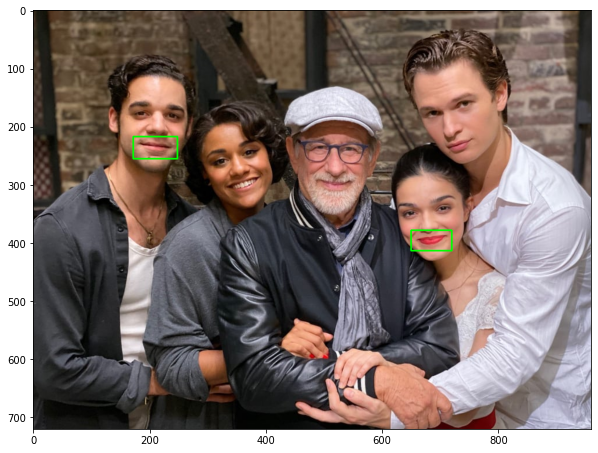

In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
for (x,y,w,h) in faces:
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

# Eye Detection

Using the pre-trained model haarcascade_frontalface_default.xml to detect faces on the pictures.

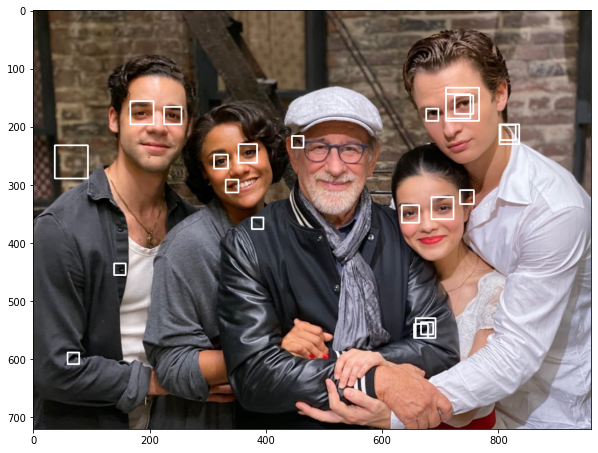

In [ ]:
test_image = cv2.imread('test.jpg')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(grey, 1.3, 1)
for (x,y,w,h) in eyes:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

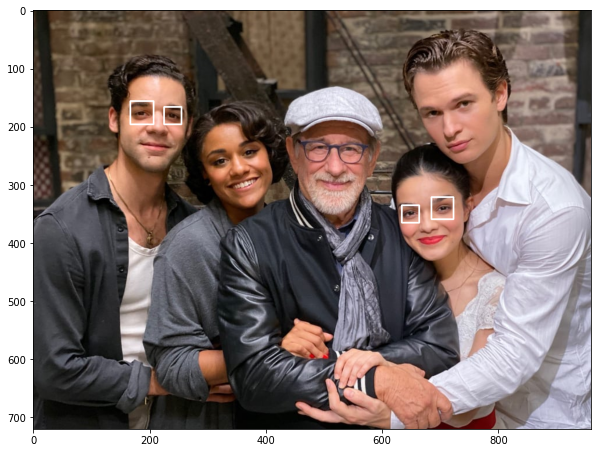

In [ ]:
test_image = cv2.imread('test.jpg')
for (x,y,w,h) in faces:
  #cv2.rectangle(smile_faces_base_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

## Putting all together



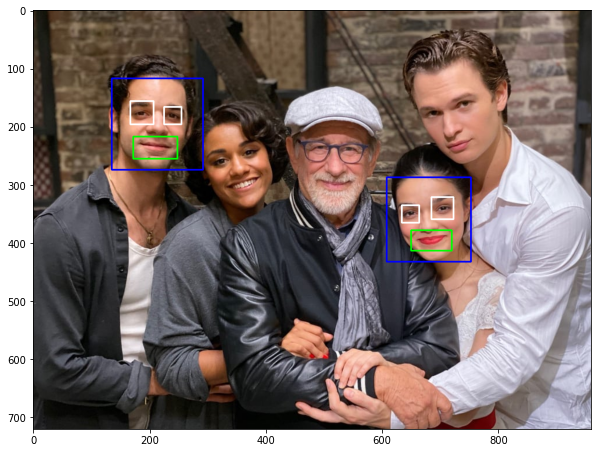

In [ ]:
test_image = cv2.imread('test.jpg')
for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

# Modern Object Recognition

Although most of this type of object detection has recently been replaced in the industry by solutions based on Deep Neural Networks models created and trained in platforms like [TensorFlow](https://www.tensorflow.org/), the Viola Jones method for face detection is still a really well respected detector.
And even in modern DNN-based systems OpenCV is still widely used for image manipulation, pre and post-processing .
